### Modeling

##### To start with: We remember some of the options we have to optimize the learning of our models

**1. Hyperparameter Tuning**: Fine-tune the hyperparameters of your model to find the optimal combination for your specific problem. Use techniques like grid search, random search, or Bayesian optimization to systematically explore the hyperparameter space and identify the best configuration.


**2. Cross-Validation**: Utilize cross-validation techniques, such as k-fold cross-validation, to evaluate your model's performance more reliably. This helps to assess how well your model generalizes to unseen data and reduces the risk of overfitting.


**3. Regularization**: Apply regularization techniques like L1 or L2 regularization (e.g., LASSO, Ridge) to prevent overfitting. Regularization helps in reducing the complexity of the model by adding a penalty term to the loss function, promoting simpler models that generalize better.


**4. Ensemble Methods**: Explore ensemble methods like bagging, boosting, or stacking to combine multiple models and improve overall performance. Ensemble techniques can help capture different patterns in the data and reduce model variance.


**5. Data Augmentation**: If you have limited data, consider data augmentation techniques to artificially increase the size of your training set. This can involve techniques like rotation, flipping, zooming, or adding noise to your existing data.


**6. Early Stopping**: Implement early stopping during model training to prevent overfitting and find the optimal number of training epochs. Early stopping stops training when the model's performance on a validation set starts to deteriorate.


**7. Batch Normalization**: Apply batch normalization techniques to normalize the activations of the previous layer in your neural network. This can improve model stability and convergence speed.


**8. Model Architecture**: Experiment with different model architectures or network architectures, such as adding or removing layers, adjusting layer sizes, or trying different activation functions. It can help to explore pre-trained models or architectures specifically designed for your problem domain.


**9. Monitoring and Debugging**: Monitor your model during training, track performance metrics, and analyze learning curves to identify issues like underfitting, overfitting, or convergence problems. Debug any potential errors, explore misclassified samples, and consider adjusting your model or data accordingly.

We firstly read the our cleaned data and recall our splits:

In [1]:
import pandas as pd
flights = pd.read_csv("cleaned_flights.csv")
results_df = pd.DataFrame(index=[], columns= ['Accuracy', 'F1 Macro', 'Precision Macro', 'Recall Macro'])

#### Recall that we need to split our data:

In [2]:
from sklearn.model_selection import train_test_split
y = flights['DELAYED']
X = flights.drop(['DELAYED', 'ARRIVAL_DELAY'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using different machine learning algorithms before solving a problem allows you to explore the algorithm landscape, select the most appropriate algorithm for your specific problem, and potentially improve the model's performance and generalization capabilities. It helps you make informed decisions based on empirical evidence rather than relying solely on a single algorithm. Therefore, we are going to try with a bunch of them and evaluate which of them does better when explaining our data. 

### Linear Classifiers

The `sns.pairplot()` function from the Seaborn library is used to create a grid of scatter plots showing the relationships between pairs of variables in a dataset. By specifying the hue parameter, we can also visualize the relationship based on a categorical variable.

In [18]:
import seaborn as sns
sub_df = flights.sample(frac=0.001, random_state=42)
sns.pairplot(data=sub_df, hue='DELAYED');


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x2cbdd0e50> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x2cc0e0ca0> (for post_execute):



KeyboardInterrupt



From the output we observe some linear relations that may be interesting in order to make predictions. However it won't be a simple task since we observe a lot of variables that don't seem to show clear frontiers between delayed and non-delayed flights. 

##### Therefore, we proceed to do some modelling so we can choose the optimal way to do our predictions

#### Support Vector Machine
we will explore the implementation of a Support Vector Machine (SVM) using the scikit-learn library. Specifically, we will use the SVM implementation from scikit-learn's svm module to build a classification model. We first start by doing a trivial fitting.

In [ ]:
from sklearn.model_selection import train_test_split,  KFold, cross_validate, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(clf , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Gaussian Naive Bayes',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

Once we've fitted our model, some things we may want to check in order to upgrade our results are the following: 

**Feature Scaling:** We may double check if our features are correctly scaled. 

array([[<AxesSubplot: xlabel='DELAYED', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='DEPARTURE_DELAY', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='TAXI_OUT', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='WHEELS_OFF', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='SCHEDULED_TIME', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='DISTANCE', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='ARRIVAL_DELAY', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='Q_YEAR_1', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='Q_YEAR_2', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='Q_YEAR_3', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='FORTNIGHT_1', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='FORTNIGHT_2', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='WEEK_INFO_1', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='WEEK_INFO_2', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='AC_Low-Cost', ylabel='DELAYED'>,
        <AxesSubplot: xlabel='AC_Major', ylabel='DELAYED'>,
      

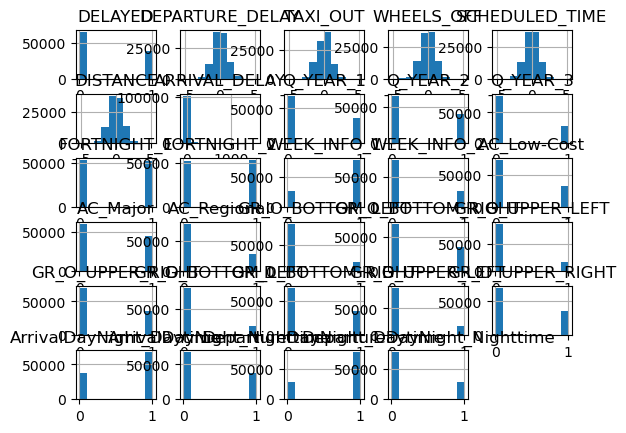

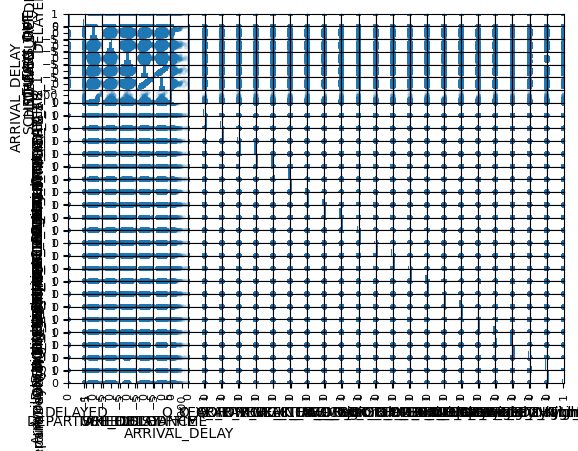

In [9]:
# Calculate summary statistics
summary_stats = flights.describe()
# Visualize the distributions
flights.hist()
# Examine scatter plots
pd.plotting.scatter_matrix(flights, alpha=0.2)

In [10]:
flights.describe()

,DELAYED,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY,Q_YEAR_1,Q_YEAR_2,Q_YEAR_3,...,GR_O_UPPER_LEFT,GR_O_UPPER_RIGHT,GR_D_BOTTOM_LEFT,GR_D_BOTTOM_RIGHT,GR_D_UPPER_LEFT,GR_D_UPPER_RIGHT,ArrivalDayNight_Daytime,ArrivalDayNight_Nighttime,DepartureDayNight_Daytime,DepartureDayNight_Nighttime
count,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,...,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000,104624.000000
mean,0.372630,0.005145,0.009024,-0.001150,-0.010991,0.002499,4.923784,0.351898,0.380773,0.267329,...,0.163538,0.337112,0.157172,0.341059,0.164599,0.337169,0.643371,0.356629,0.729747,0.270253
std,0.483507,0.994457,0.990909,1.021696,0.984441,0.975562,40.231031,0.477565,0.485579,0.442567,...,0.369858,0.472726,0.363965,0.474068,0.370820,0.472745,0.479006,0.479006,0.444093,0.444093
min,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-70.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.764710,-0.589456,-0.666564,-0.682458,-0.664809,-13.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.088734,0.025322,0.004869,0.000000,-0.015192,-5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.698526,0.731217,0.685657,0.682458,0.665248,8.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,5.199338,5.199338,5.199338,5.199338,5.199338,1557.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As we observe that the variables are close to that of N(0,1), we can proceed with **hyperparameter tuning:**

In the specific case of SVC we have the following parameters we can tune: 

1.C: Regularization parameter. It controls the trade-off between allowing training errors and maximizing the margin. Larger values of C penalize errors more, leading to a potentially narrower margin.

2.kernel: Specifies the type of kernel function used for mapping the input data to a higher-dimensional feature space. Common options include linear, polynomial, radial basis function (RBF), and sigmoid.

3.gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. It defines the influence of training samples on the decision boundary. Higher values of gamma result in more complex decision boundaries.

4.degree:  Degree of the polynomial kernel function. It is only applicable when kernel is set to 'poly'.

5.coef0:  Independent term in the polynomial and sigmoid kernels. It controls the influence of higher-order terms.

6.shrinking: Boolean parameter indicating whether to use the shrinking heuristic. It speeds up training by discarding support vectors that are unlikely to affect the decision boundary.

7.probability: Boolean parameter enabling probability estimates. It internally enables probability estimates using the probability parameter in the LibSVM implementation.

8.tol: Tolerance for stopping criteria. It controls the stopping criterion for the iterative solver used in the training algorithm.

9.class_weight: Weights associated with classes. It can be used to address class imbalance by assigning higher weights to minority classes.

10.max_iter: Maximum number of iterations for solver convergence. It specifies the maximum number of passes over the training data.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Create an SVM classifier
svm = SVC()

# Define the parameter distributions for randomized search
param_distributions = {
    'C': uniform(loc=0.1, scale=10),
    'gamma': uniform(loc=0.1, scale=10)
}

# Perform randomized search with cross-validation
randomized_search = RandomizedSearchCV(estimator=svm, param_distributions=param_distributions, n_iter=10, cv=5)
randomized_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", randomized_search.best_params_)
print("Best Score: ", randomized_search.best_score_)


In this case in order to tune our hyperparameters, since it takes a while to fit SVC's we are going to use the RandomizedSearchCV function. The RandomizedSearchCV function in scikit-learn is a method for hyperparameter tuning that performs a randomized search over a specified parameter distribution instead of an exhaustive grid search. It randomly samples a fixed number of hyperparameter settings and evaluates their performance using cross-validation.

We now fit and calculate the accuracy of the model with the best hyperparameters we've found. 

#### Naive Bayes
We now fit the normal model: 

In [26]:
from sklearn.model_selection import train_test_split,  KFold, cross_validate, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive = GaussianNB()
naive.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(naive , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Gaussian Naive Bayes Before HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365


The parameters GaussianNB are the following: 
Priors: Prior probabilities of the classes. If specified, the priors are not adjusted according to the data.
Var_smoothing:Portion of the largest variance of all features that is added to variances for calculation stability.

However we are only going to tune var_smoothing: 

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipeline = Pipeline([
    ('classifier', GaussianNB())
])

param_grid = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.2, 0.25 ,0.3 , 0.35, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] 
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'classifier__var_smoothing': 0.3}
Best Score:  0.8030681658805087


   We now fit and calculate the accuracy score that fits the best. (having chosen a good classifier__var_smoothing).

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive = GaussianNB(var_smoothing = 0.3)
naive.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(naive , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Gaussian Naive Bayes After HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288


#### LDA

We now fit the Linear Discriminant Analysis classifier: 

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(lda , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['LDA Before HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288
LDA Before HT,0.834395,0.819158,0.82693,0.813599
LDA After HT,0.803068,0.774064,0.809118,0.761288


We now tune hyperparameters:

n_components: This hyperparameter specifies the number of components (dimensions) to retain after performing dimensionality reduction with LDA. By default, n_components is set to None, which means it will retain (n_classes - 1) components, where n_classes is the number of distinct classes in the data. In the param_grid, values of [None, 1, 2, 3] are provided to try different numbers of retained components. By setting n_components to a specific value, you can explicitly control the dimensionality of the reduced feature space.

shrinkage: Shrinkage is a regularization technique used to improve the estimation of the covariance matrix in LDA, especially when the number of samples is small or the covariance matrix is ill-conditioned. The shrinkage hyperparameter controls the degree of shrinkage applied. 
In the param_grid, the values [None, 'auto', 0.1, 0.5] are provided to try different levels of shrinkage:
None: No shrinkage is applied.
'auto': Shrinkage is estimated using the Ledoit-Wolf lemma, which automatically determines the amount of shrinkage based on the data.
0.1, 0.5: Specific values between 0 and 1 can be provided to manually set the shrinkage intensity.

solver: This hyperparameter specifies the solver used for LDA computation. LDA can be solved using different algorithms, and the solver parameter determines the specific algorithm to use. 
In the param_grid, the values ['svd', 'lsqr', 'eigen'] are provided to try different solver algorithms:
'svd': Singular Value Decomposition (SVD) solver, which computes the exact solution but can be slower for large datasets.
'lsqr': Least Squares solver, which can handle both shrinkage and regularized covariance matrix.
'eigen': Eigenvalue Decomposition solver, which computes the eigenvalues and eigenvectors of the covariance matrix.

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV

# Create an LDA classifier
lda = LinearDiscriminantAnalysis()

# Define the parameter grid
param_grid = {
    'n_components': [None, 1, 2, 3],    # Values to try for n_components
    'shrinkage': [None, 'auto', 0.1, 0.5],    # Values to try for shrinkage
    'solver': ['svd', 'lsqr', 'eigen']    # Values to try for solver
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'n_components': None, 'shrinkage': 'auto', 'solver': 'lsqr'}
Best Score:  0.8345739219386429


/Users/marcamps/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/marcamps/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/marcamps/env/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "/Users/marcamps/env/lib/python3.8/site-packages/sklearn/discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/Use

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
lda = LinearDiscriminantAnalysis(n_components = None,shrinkage = 'auto',  solver = 'lsqr')
lda.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(lda , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['LDA After HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288
LDA Before HT,0.834395,0.819158,0.82693,0.813599
LDA After HT,0.834574,0.819341,0.827151,0.813761


We gained a bit of accuracy, however the change is not that meaningful. 

#### Perceptron
We now fit the normal model for the perceptron: 

In [43]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create a Perceptron classifier
perceptron = Perceptron()
# Train the Perceptron classifier
perceptron.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(perceptron , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Perceptron Before HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df


,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288
LDA Before HT,0.834395,0.819158,0.82693,0.813599
LDA After HT,0.834574,0.819341,0.827151,0.813761
Perceptron Before HT,0.76689,0.752281,0.761397,0.757479


We now tune the hyperparameters:

penalty: Specifies the penalty term used in the update rule to handle misclassifications. It can be set to 'l1', 'l2', or 'elasticnet'. The default value is 'l2'.

alpha: The constant that multiplies the penalty term if regularization is applied. It controls the strength of the regularization. The default value is 0.0001.

fit_intercept: Indicates whether an intercept term should be included in the model. If set to True, the perceptron learns an intercept term. The default value is True.

max_iter: The maximum number of passes over the training data (epochs) for training the perceptron. The default value is 1000.

tol: The tolerance for the stopping criterion. It specifies the minimum change in the average loss for training to continue. The default value is 1e-3.

shuffle: Determines whether to shuffle the training data before each epoch during training. The default value is True.

eta0: The initial learning rate. It controls the step size at each update during training. The default value is 1.0.

early_stopping: If set to True, training will stop when validation loss does not improve anymore. The default value is False.

validation_fraction: The proportion of training data to use for early stopping validation. The default value is 0.1.

n_iter_no_change: The maximum number of epochs to wait for the validation loss to improve when early_stopping is enabled. The default value is 5.

In [44]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

# Create a Perceptron classifier
perceptron = Perceptron()

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization penalty type
    'alpha': [0.0001, 0.001, 0.01],         # Regularization parameter
    'max_iter': [1000, 2000, 3000],         # Maximum number of iterations
    'eta0': [0.1, 0.01, 0.001],             # Initial learning rate
    'tol': [1e-3, 1e-4, 1e-5]               # Tolerance for stopping criterion
}
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=perceptron, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'alpha': 0.0001, 'eta0': 0.01, 'max_iter': 1000, 'penalty': 'l2', 'tol': 0.001}
Best Score:  0.7861265762504709


We now fit the model with appropiate hyperparameters. 

In [45]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Create a Perceptron classifier
perceptron = Perceptron(alpha = 0.0001, eta0 = 0.01, max_iter = 1000, penalty = 'l2', tol = 0.001)
# Train the Perceptron classifier
perceptron.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(perceptron , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Perceptron After HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df


,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288
LDA Before HT,0.834395,0.819158,0.82693,0.813599
LDA After HT,0.834574,0.819341,0.827151,0.813761
Perceptron Before HT,0.76689,0.752281,0.761397,0.757479
Perceptron After HT,0.786127,0.765553,0.774573,0.762622


#### Gradient Boost
We first fit the ordinary model: 

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
# Train the classifier
gb_classifier.fit(X_train, y_train)
# Predict the target variable for the test set
cross_val_results = pd.DataFrame(cross_validate(gb_classifier , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Gradient Boost Before HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288
LDA Before HT,0.834395,0.819158,0.82693,0.813599
LDA After HT,0.834574,0.819341,0.827151,0.813761
Perceptron Before HT,0.76689,0.752281,0.761397,0.757479
Perceptron After HT,0.786127,0.765553,0.774573,0.762622
Gradient Boost Before HT,0.859198,0.842775,0.864191,0.831116


We now tune hyperparameters: 

subsample: The fraction of samples used for fitting each individual tree.

min_samples_split: The minimum number of samples required to split an internal node. 

learning_rate: The learning rate determines the contribution of each tree to the ensemble. A lower learning rate requires more trees to build a robust model but can yield better generalization.


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(learning_rate = 0.5)

# Define the parameter grid
param_grid = {
    'subsample': [1.0],                   # Values to try for subsample
    'min_samples_split': [5, 10],                 # Values to try for min_samples_split
    'learning_rate': [0.5]# Learning rate
}

# Perform grid search with cross-validation (5-Fold Cross validation)
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'learning_rate': 0.5, 'min_samples_split': 10, 'subsample': 1.0}
Best Score:  0.864980512889472


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(learning_rate = 0.5, criterion= "friedman_mse", loss = "log_loss")
# Train the classifier
gb_classifier.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(gb_classifier , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Gradient Boost After HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288
LDA Before HT,0.834395,0.819158,0.82693,0.813599
LDA After HT,0.834574,0.819341,0.827151,0.813761
Perceptron Before HT,0.76689,0.752281,0.761397,0.757479
Perceptron After HT,0.786127,0.765553,0.774573,0.762622
Gradient Boost Before HT,0.859198,0.842775,0.864191,0.831116
Gradient Boost After HT,0.864646,0.849542,0.868328,0.838697


### Random forest
We first fit the normal model: 

In [52]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)
cross_val_results = pd.DataFrame(cross_validate(rf_classifier , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Random Forest Before HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288
LDA Before HT,0.834395,0.819158,0.82693,0.813599
LDA After HT,0.834574,0.819341,0.827151,0.813761
Perceptron Before HT,0.76689,0.752281,0.761397,0.757479
Perceptron After HT,0.786127,0.765553,0.774573,0.762622
Gradient Boost Before HT,0.859198,0.842775,0.864191,0.831116
Gradient Boost After HT,0.864646,0.849542,0.868328,0.838697
Random Forest Before HT,0.855554,0.839043,0.85888,0.828007


We now tune hyperparameters: 

n_estimators: The number of decision trees in the random forest. Increasing the number of estimators typically improves performance but increases computational complexity. It represents the ensemble size.

max_depth: The maximum depth of each decision tree in the forest. Higher values increase model complexity and can lead to overfitting.

min_samples_split: The minimum number of samples required to split an internal node. Larger values prevent overfitting by requiring a certain number of samples in each split.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Similar to min_samples_split, larger values help control overfitting by requiring a minimum number of samples in each leaf.

max_features: The number of features to consider when looking for the best split. Reducing this number can help control overfitting. Values such as 'sqrt' or 'log2' can be used to consider a square root or logarithm of the total features, respectively.

bootstrap: Determines whether bootstrap samples are used when building trees. Setting it to True enables bootstrap sampling, while False disables it. Bootstrap sampling introduces randomness into the training process and helps improve model diversity.

criterion: The function used to measure the quality of a split. For classification, 'gini' or 'entropy' are commonly used. For regression, 'mse' (mean squared error) or 'mae' (mean absolute error) can be used.

We have an additional parameter (not to tune) : 
criterion: The function used to measure the quality of a split. For classification, 'gini' or 'entropy' are commonly used. For regression, 'mse' (mean squared error) or 'mae' (mean absolute error) can be used.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a Random Forest classifier
random_forest = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'random_state': [42],
    'criterion': ['gini', 'entropy']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


KeyboardInterrupt: 

In [53]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(max_depth= None, max_features = 'auto')
# Train the classifier
rf_classifier.fit(X_train, y_train)
# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)
cross_val_results = pd.DataFrame(cross_validate(rf_classifier , X_train, y_train, cv = 5, scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'] ))
results_df.loc['Random Forest After HT',:] = cross_val_results[['test_accuracy', 'test_f1_macro',
       'test_precision_macro', 'test_recall_macro']].mean().values
results_df

/Users/marcamps/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marcamps/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marcamps/env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the def

,Accuracy,F1 Macro,Precision Macro,Recall Macro
Gaussian Naive Bayes Before HT,0.776353,0.75629,0.761836,0.752365
Gaussian Naive Bayes After HT,0.803068,0.774064,0.809118,0.761288
LDA Before HT,0.834395,0.819158,0.82693,0.813599
LDA After HT,0.834574,0.819341,0.827151,0.813761
Perceptron Before HT,0.76689,0.752281,0.761397,0.757479
Perceptron After HT,0.786127,0.765553,0.774573,0.762622
Gradient Boost Before HT,0.859198,0.842775,0.864191,0.831116
Gradient Boost After HT,0.864646,0.849542,0.868328,0.838697
Random Forest Before HT,0.855554,0.839043,0.85888,0.828007
Random Forest After HT,0.856462,0.840113,0.859761,0.829118


#### Neural Nets
We now do some neural nets. In order to 

In [59]:
!pip install scikeras

In [61]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_validate

# Define a function to create your neural network model
def create_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_dim=input_dim))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier with your model function
keras_classifier = KerasClassifier(model=create_model, epochs=10, batch_size=32)

In [63]:
# Perform cross-validation
cross_val_results = cross_validate(keras_classifier, X_train, y_train, cv=5, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])

# Extract and print the mean scores
print("Mean Accuracy:", cross_val_results['test_accuracy'].mean())
print("Mean F1 Macro:", cross_val_results['test_f1_macro'].mean())
print("Mean Precision Macro:", cross_val_results['test_precision_macro'].mean())
print("Mean Recall Macro:", cross_val_results['test_recall_macro'].mean())


Epoch 1/10
  19/2093 [..............................] - ETA: 11s - loss: 0.5789 - accuracy: 0.6776

2023-05-17 20:20:44.799548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2093/2093 [==============================] - 10s 5ms/step - loss: 0.3484 - accuracy: 0.8539
Epoch 2/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3280 - accuracy: 0.8633
Epoch 3/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3239 - accuracy: 0.8643
Epoch 4/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3224 - accuracy: 0.8652
Epoch 5/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3194 - accuracy: 0.8670
Epoch 6/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3184 - accuracy: 0.8666
Epoch 7/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3169 - accuracy: 0.8684
Epoch 8/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3154 - accuracy: 0.8684
Epoch 9/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3146 - accuracy: 0.8688
Epoch 10/10
126/524 [======>.......................] - ETA: 0s

2023-05-17 20:22:24.557944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


524/524 [==============================] - 1s 1ms/step
Epoch 1/10
   9/2093 [..............................] - ETA: 14s - loss: 0.6855 - accuracy: 0.5243 

2023-05-17 20:22:25.565557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2093/2093 [==============================] - 10s 5ms/step - loss: 0.3518 - accuracy: 0.8512
Epoch 2/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3308 - accuracy: 0.8624
Epoch 3/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3266 - accuracy: 0.8637
Epoch 4/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3239 - accuracy: 0.8648
Epoch 5/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3222 - accuracy: 0.8665
Epoch 6/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3204 - accuracy: 0.8662
Epoch 7/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3192 - accuracy: 0.8672
Epoch 8/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3181 - accuracy: 0.8670
Epoch 9/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3166 - accuracy: 0.8674
Epoch 10/10
131/524 [======>.......................] - ETA: 0s

2023-05-17 20:24:06.333501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


524/524 [==============================] - 1s 1ms/step
Epoch 1/10
   8/2093 [..............................] - ETA: 15s - loss: 0.6435 - accuracy: 0.6406 

2023-05-17 20:24:07.184101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2093/2093 [==============================] - 10s 5ms/step - loss: 0.3509 - accuracy: 0.8525
Epoch 2/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3268 - accuracy: 0.8636
Epoch 3/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3229 - accuracy: 0.8652
Epoch 4/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3203 - accuracy: 0.8668
Epoch 5/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3183 - accuracy: 0.8679
Epoch 6/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3175 - accuracy: 0.8677
Epoch 7/10
2093/2093 [==============================] - 11s 5ms/step - loss: 0.3155 - accuracy: 0.8687
Epoch 8/10
2093/2093 [==============================] - 11s 5ms/step - loss: 0.3145 - accuracy: 0.8693
Epoch 9/10
2093/2093 [==============================] - 11s 5ms/step - loss: 0.3133 - accuracy: 0.8697
Epoch 10/10
121/524 [=====>........................] - ETA: 0s

2023-05-17 20:25:50.763517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


524/524 [==============================] - 1s 1ms/step
Epoch 1/10
   8/2093 [..............................] - ETA: 16s - loss: 0.6787 - accuracy: 0.5703 

2023-05-17 20:25:51.649187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2093/2093 [==============================] - 11s 5ms/step - loss: 0.3520 - accuracy: 0.8490
Epoch 2/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3296 - accuracy: 0.8630
Epoch 3/10
2093/2093 [==============================] - 11s 5ms/step - loss: 0.3261 - accuracy: 0.8648
Epoch 4/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3235 - accuracy: 0.8648
Epoch 5/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3220 - accuracy: 0.8653
Epoch 6/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3201 - accuracy: 0.8662
Epoch 7/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3188 - accuracy: 0.8665
Epoch 8/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3178 - accuracy: 0.8678
Epoch 9/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3159 - accuracy: 0.8686
Epoch 10/10
124/524 [======>.......................] - ETA: 0s

2023-05-17 20:27:35.475362: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


524/524 [==============================] - 1s 1ms/step
Epoch 1/10
   7/2093 [..............................] - ETA: 18s - loss: 0.7524 - accuracy: 0.3616 

2023-05-17 20:27:36.342582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2093/2093 [==============================] - 11s 5ms/step - loss: 0.3522 - accuracy: 0.8500
Epoch 2/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3299 - accuracy: 0.8621
Epoch 3/10
2093/2093 [==============================] - 11s 5ms/step - loss: 0.3254 - accuracy: 0.8644
Epoch 4/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3233 - accuracy: 0.8647
Epoch 5/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3214 - accuracy: 0.8663
Epoch 6/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3210 - accuracy: 0.8656
Epoch 7/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3191 - accuracy: 0.8669
Epoch 8/10
2093/2093 [==============================] - 10s 5ms/step - loss: 0.3181 - accuracy: 0.8679
Epoch 9/10
2093/2093 [==============================] - 11s 5ms/step - loss: 0.3166 - accuracy: 0.8679
Epoch 10/10
116/524 [=====>........................] - ETA: 0s

2023-05-17 20:29:21.156782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


524/524 [==============================] - 1s 2ms/step
Mean Accuracy: 0.8646340281029794
Mean F1 Macro: 0.8490613837962566
Mean Precision Macro: 0.8700610207540889
Mean Recall Macro: 0.8375805409345658


# FINS AQUI ESTÀ TOT PROU FET

### falten hyperparameter tunning de SVM, GradientBoost, RandomForest, Xarxes neuronals

In [61]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Nadam

# Define the architecture of the neural network
input_dim = X_train.shape[1]  # Number of input features

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=input_dim))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Nadam optimizer
optimizer = Nadam(learning_rate=0.001)  # Tunable learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict the target variable probabilities for the test set
y_pred_prob = model.predict(X_test)

# Apply a threshold to obtain binary predictions
threshold = 0.5  # Adjust as needed
y_pred = (y_pred_prob >= threshold).astype(int)

# Find the indices of misclassified flights
misclassified_indices = np.where(y_pred != y_test)[0]

# Get the actual misclassified flights
misclassified_flights = X_test[misclassified_indices]

# Print the misclassified flights
for flight in misclassified_flights:
    print(flight)


Epoch 1/10


2023-05-17 09:12:53.340214: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2616/2616 [==============================] - 20s 8ms/step - loss: 0.3460 - accuracy: 0.8533
Epoch 2/10
2616/2616 [==============================] - 19s 7ms/step - loss: 0.3276 - accuracy: 0.8631
Epoch 3/10
2616/2616 [==============================] - 19s 7ms/step - loss: 0.3240 - accuracy: 0.8645
Epoch 4/10
2616/2616 [==============================] - 19s 7ms/step - loss: 0.3219 - accuracy: 0.8655
Epoch 5/10
2616/2616 [==============================] - 19s 7ms/step - loss: 0.3201 - accuracy: 0.8665
Epoch 6/10
2616/2616 [==============================] - 19s 7ms/step - loss: 0.3190 - accuracy: 0.8672
Epoch 7/10
2616/2616 [==============================] - 19s 7ms/step - loss: 0.3173 - accuracy: 0.8673
Epoch 8/10
2616/2616 [==============================] - 19s 7ms/step - loss: 0.3163 - accuracy: 0.8678
Epoch 9/10
2616/2616 [==============================] - 19s 7ms/step - loss: 0.3152 - accuracy: 0.8686
Epoch 10/10
125/654 [====>.........................] - ETA: 0s

2023-05-17 09:16:06.316097: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


654/654 [==============================] - 1s 1ms/step


/var/folders/6p/292cfjv12xd9n9pzpglsj3w00000gn/T/ipykernel_4026/1179526287.py:29: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  misclassified_indices = np.where(y_pred != y_test)[0]


ValueError: Data must be 1-dimensional